In [9]:
import pandas as pd
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

# Load parquet

In [3]:
BASE = Path("/work/scratch-nopw2/mendrika/ASNIE")

df_core = pd.read_parquet(BASE / "core_thr_50p0.parquet")
df_roa  = pd.read_parquet(BASE / "roa_thr_2p9205.parquet")

print(len(df_core), len(df_roa))
df_core.head()

291147 1771733


,label,lat_centroid,lon_centroid,lat_min,lat_max,lon_min,lon_max,size,n_pix,mean_core,max_core,elongation,eccentricity,time,year,month,day,hour
0,5,10.396107,-15.442365,9.920712,10.951667,-15.972660,-14.761806,4943.068848,497,128.645875,230.0,4.690167,0.977006,2020-06-01,2020,6,1,0
1,4,9.823995,-14.260213,9.628974,10.074762,-14.586429,-13.959379,2366.080566,241,102.464730,117.0,2.001866,0.866294,2020-06-01,2020,6,1,0
2,1,7.216585,-16.014019,6.948117,7.473006,-16.249344,-15.767417,2018.376953,205,132.702439,204.0,1.744730,0.819447,2020-06-01,2020,6,1,0
3,2,7.827221,-13.245349,7.648042,8.008396,-13.383137,-13.119824,1042.138428,108,117.666667,189.0,1.323342,0.654961,2020-06-01,2020,6,1,0
4,3,8.499214,-16.200968,8.418586,8.586676,-16.290674,-16.111603,406.610413,41,161.195122,233.0,1.161049,0.508114,2020-06-01,2020,6,1,0


In [12]:
def summary(name, data):
    print(f"\n--- {name} ---")
    print("Count:", len(data))
    print("Median:", np.median(data))
    print("Mean:", np.mean(data))
    print("90th pct:", np.percentile(data, 90))
    print("95th pct:", np.percentile(data, 95))
    print("99th pct:", np.percentile(data, 99))

summary("Core size", df_core["size"].values)
summary("RoA size", df_roa["size"].values)


--- Core size ---
Count: 291147
Median: 810.1604614257812
Mean: 2730.11430763182
90th pct: 7831.027343749999
95th pct: 12740.500195312503
99th pct: 23386.21230468746

--- RoA size ---
Count: 1771733
Median: 371.4438534134926
Mean: 2110.735838915063
90th pct: 3702.933300707225
95th pct: 8397.465048984703
99th pct: 36247.76327662602


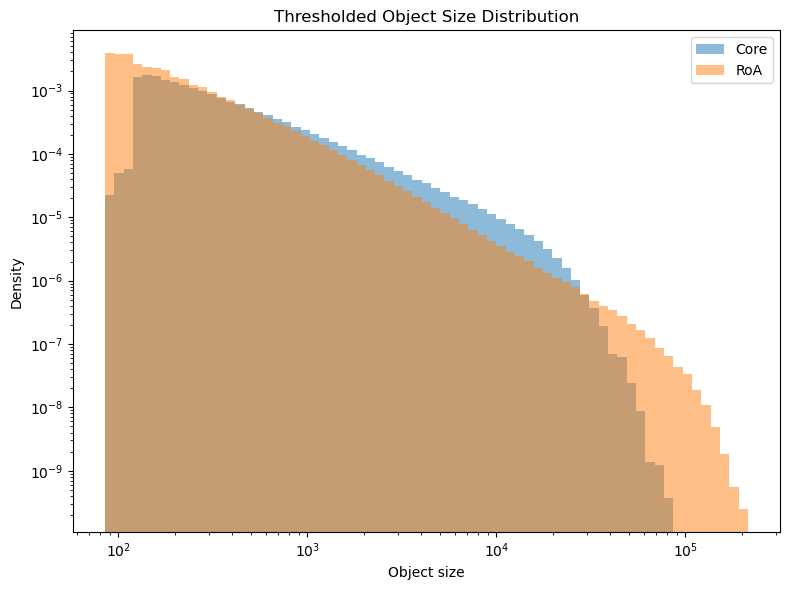

In [13]:
import matplotlib.pyplot as plt
import numpy as np

core_sizes = df_core["size"].values
roa_sizes  = df_roa["size"].values

core_sizes = core_sizes[core_sizes > 0]
roa_sizes  = roa_sizes[roa_sizes > 0]

bins = np.logspace(
    np.log10(min(core_sizes.min(), roa_sizes.min())),
    np.log10(max(core_sizes.max(), roa_sizes.max())),
    70
)

plt.figure(figsize=(8,6))

plt.hist(core_sizes, bins=bins, density=True, alpha=0.5, label="Core")
plt.hist(roa_sizes,  bins=bins, density=True, alpha=0.5, label="RoA")

plt.xscale("log")
plt.yscale("log")

plt.xlabel("Object size")
plt.ylabel("Density")
plt.title("Thresholded Object Size Distribution")
plt.legend()
plt.tight_layout()
plt.show()

# Start analysis

In [4]:
def basic_stats(df, name):
    print(f"\n--- {name} ---")
    print("Rows:", len(df))
    print("Columns:", df.columns.tolist())

basic_stats(df_core, "CORE")
basic_stats(df_roa, "ROA")


--- CORE ---
Rows: 291147
Columns: ['label', 'lat_centroid', 'lon_centroid', 'lat_min', 'lat_max', 'lon_min', 'lon_max', 'size', 'n_pix', 'mean_core', 'max_core', 'elongation', 'eccentricity', 'time', 'year', 'month', 'day', 'hour']

--- ROA ---
Rows: 1771733
Columns: ['label', 'lat_centroid', 'lon_centroid', 'lat_min', 'lat_max', 'lon_min', 'lon_max', 'size', 'n_pix', 'mean_roa', 'max_roa', 'elongation', 'eccentricity', 'time', 'year', 'month', 'day', 'hour']


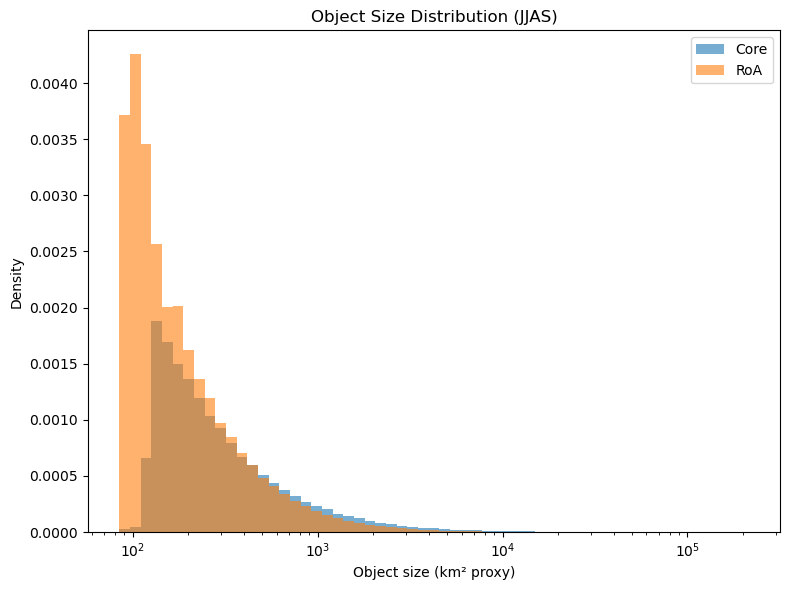

In [10]:
core_sizes = df_core["size"].values
roa_sizes  = df_roa["size"].values

# Remove zeros or negatives if any
core_sizes = core_sizes[core_sizes > 0]
roa_sizes  = roa_sizes[roa_sizes > 0]

# Log bins
bins = np.logspace(
    np.log10(min(core_sizes.min(), roa_sizes.min())),
    np.log10(max(core_sizes.max(), roa_sizes.max())),
    60
)

plt.figure(figsize=(8,6))

plt.hist(core_sizes, bins=bins, density=True, alpha=0.6, label="Core")
plt.hist(roa_sizes,  bins=bins, density=True, alpha=0.6, label="RoA")

plt.xscale("log")
plt.xlabel("Object size (km² proxy)")
plt.ylabel("Density")
plt.title("Object Size Distribution (JJAS)")
plt.legend()

plt.tight_layout()
plt.show()

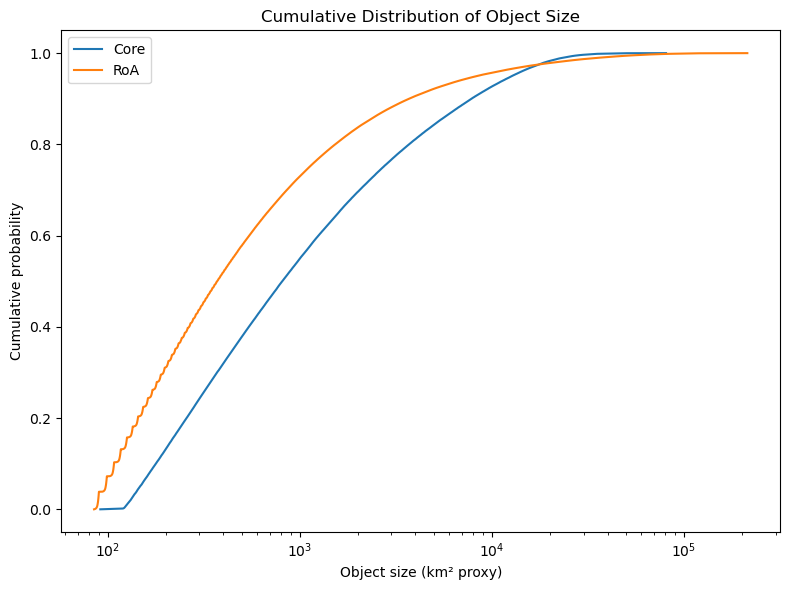

In [11]:
def plot_cdf(data, label):
    data_sorted = np.sort(data)
    y = np.arange(1, len(data_sorted)+1) / len(data_sorted)
    plt.plot(data_sorted, y, label=label)

plt.figure(figsize=(8,6))

plot_cdf(core_sizes, "Core")
plot_cdf(roa_sizes, "RoA")

plt.xscale("log")
plt.xlabel("Object size (km² proxy)")
plt.ylabel("Cumulative probability")
plt.title("Cumulative Distribution of Object Size")
plt.legend()

plt.tight_layout()
plt.show()

# Object count per timestep

In [5]:
def objects_per_time(df, time_col="time"):
    counts = df.groupby(time_col).size()
    return counts

core_counts = objects_per_time(df_core)
roa_counts  = objects_per_time(df_roa)

print("Mean objects per timestep:")
print("Core:", core_counts.mean())
print("RoA :", roa_counts.mean())

Mean objects per timestep:
Core: 5.687909039404536
RoA : 34.61362481928652


# Area comparison

In [7]:
print("Mean object size (km² proxy via n_pix):")
print("Core:", df_core["n_pix"].mean())
print("RoA :", df_roa["n_pix"].mean())

print("\nMedian object size:")
print("Core:", df_core["n_pix"].median())
print("RoA :", df_roa["n_pix"].median())

Mean object size (km² proxy via n_pix):
Core: 278.1891106554421
RoA : 238.16552606967304

Median object size:
Core: 83.0
RoA : 42.0


# Temporal overlap baseline

In [ ]:
core_times = set(df_core["time"].unique())
roa_times  = set(df_roa["time"].unique())

# set to allow intersection
common_times = core_times.intersection(roa_times)

print("Total core timesteps:", len(core_times))
print("Total RoA timesteps :", len(roa_times))
print("Common timesteps    :", len(common_times))

Total core timesteps: 51187
Total RoA timesteps : 51186
Common timesteps    : 51186


# Object-to-object spatial proximity (centroid matching baseline)

In [19]:
def distance_distribution(df1, df2):
    from scipy.spatial import cKDTree
    import numpy as np
    
    distances = []

    for t in np.intersect1d(df1["time"].unique(), df2["time"].unique()):
        d1 = df1[df1["time"] == t]
        d2 = df2[df2["time"] == t]

        if len(d1) == 0 or len(d2) == 0:
            continue

        coords1 = d1[["lat_centroid", "lon_centroid"]].values
        coords2 = d2[["lat_centroid", "lon_centroid"]].values

        tree = cKDTree(coords2)
        d, _ = tree.query(coords1, k=1)
        distances.extend(d)

    distances = np.array(distances)
    return distances

dists = distance_distribution(df_core, df_roa)

print("Median (deg):", np.median(dists))
print("75th pct:", np.quantile(dists, 0.75))
print("90th pct:", np.quantile(dists, 0.9))


Median (deg): 0.3266208564704616
75th pct: 0.6343452706854504
90th pct: 1.0279180673041575


# Fraction of cores with nearby RoA object (operational metric)

In [21]:
def fraction_within_radius(df1, df2, radius_km=25):

    deg_to_km = 111  # approx conversion
    radius_deg = radius_km / deg_to_km

    total = 0
    matched = 0

    for t in np.intersect1d(df1["time"].unique(), df2["time"].unique()):
        d1 = df1[df1["time"] == t]
        d2 = df2[df2["time"] == t]

        if len(d1) == 0 or len(d2) == 0:
            continue

        coords1 = d1[["lat_centroid", "lon_centroid"]].values
        coords2 = d2[["lat_centroid", "lon_centroid"]].values

        tree = cKDTree(coords2)
        d, _ = tree.query(coords1, k=1)

        total += len(d)
        matched += np.sum(d <= radius_deg)

    return matched / total

frac = fraction_within_radius(df_core, df_roa, radius_km=25)
print("Fraction of core objects with RoA within 25 km:", frac)

KeyboardInterrupt: 

In [11]:
(core_aligned["count"] / roa_aligned["count"]).describe()

count    51186.000000
mean         0.192031
std          0.161602
min          0.008130
25%          0.085714
50%          0.153846
75%          0.250000
max          4.000000
Name: count, dtype: float64

In [20]:
print("Within 25 km:",
      fraction_within_radius(df_core, df_roa, radius_km=25))

print("Within 50 km:",
      fraction_within_radius(df_core, df_roa, radius_km=50))

NameError: name 'fraction_within_radius' is not defined